In [56]:
import numpy as np
import matplotlib.pyplot as plt

R = 10 # sphere radius
T = 400 # simulation time
bc_1 = 100 # boundary condition 1
bc_2 = 20 # boundary condition 2

j = 0.05 # time step
k = 0.8 # space step

t = np.arange(0, T+j, j)
p = np.arange(0, R+k, k)

factor = j/(k**2)

if factor > 0.5:
    print("Factor is greater than 0.5, unstable solution")

n = len(t)
m = len(p)
T = np.zeros((n, m+1)) # includes ghost node

T[0, :] = bc_2
T[:, 0] = bc_1

for i in range(1, n):
    for j in range(1, m):
        T[i,j] = (1-2*factor)*T[i-1,j] + factor*(T[i-1,j-1] + T[i-1,j+1])
        T[i,-1] = T[i,-3] # neumann boundary condition

T = T[:, :-1] # remove ghost node
# T = np.flip(T, axis=1)
T

array([[100.        ,  20.        ,  20.        , ...,  20.        ,
         20.        ,  20.        ],
       [100.        ,  26.25      ,  20.        , ...,  20.        ,
         20.        ,  20.        ],
       [100.        ,  31.5234375 ,  20.48828125, ...,  20.        ,
         20.        ,  20.        ],
       ...,
       [100.        ,  99.99865351,  99.99732665, ...,  99.98915378,
         99.98891062,  99.98882917],
       [100.        ,  99.99865504,  99.99732969, ...,  99.98916613,
         99.98892325,  99.9888419 ],
       [100.        ,  99.99865657,  99.99733273, ...,  99.98917848,
         99.98893587,  99.98885461]])

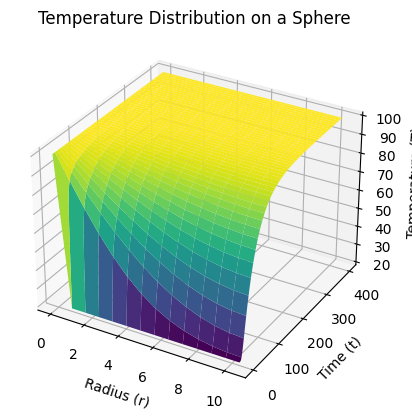

In [60]:
# Create meshgrid
tt, pp = np.meshgrid(t, p)

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pp = pp.transpose()
tt = tt.transpose()

# Plot the surface
ax.plot_surface(pp, tt, T, cmap='viridis')

# Add labels and title
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Temperature (T)')
ax.set_title('Temperature Distribution on a Sphere')

# Show the plot
plt.show()